# Quantum - Observing Iterations between on Two Grover's Algorithm Problem 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import pi
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

In [2]:
# functions 

# measurement error, gate error 
def get_noise(p_meas, p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements 
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x", "h", "mct"]) # single qubit gate error is applied to x gates 
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates 
    
    return noise_model

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # do multi-controlled-z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1) # multi-controlled toffoli
    qc.h(nqubits-1)
    # apply trnasformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # apply trnasformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # we will return diffuser as a gate 
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

## Experiment 1

Solutions:
|1101>


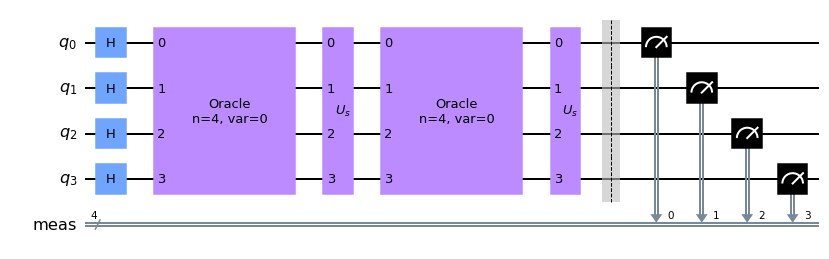

In [3]:
from qiskit_textbook.problems import grover_problem_oracle
n = 4
oracle = grover_problem_oracle(n, variant=0, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.measure_all()
qc.draw('mpl')

Peak:  1101


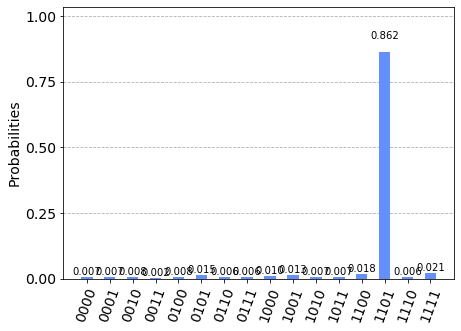

In [4]:
noise_model = get_noise(0.01, 0.000625)

backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024, noise_model=noise_model).result()
# results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
max_value = next(iter(answer.values()))

for key,value in answer.items():
    if value > max_value:
        max_value = value  
        max_key = key
print("Peak: ",max_key)

plot_histogram(answer)

Solutions:
|00100>


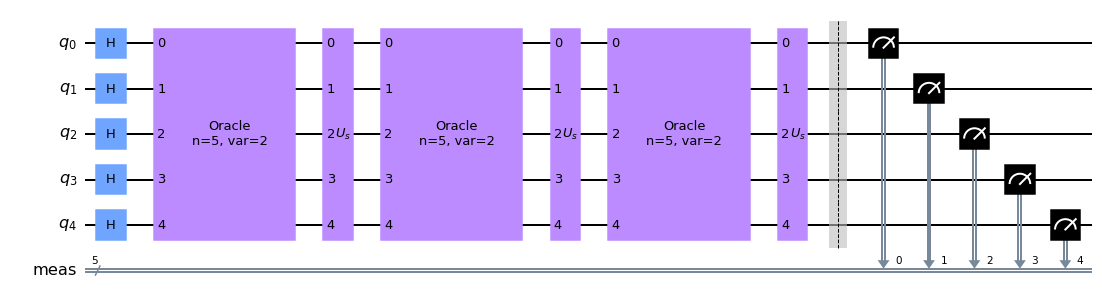

In [5]:
from qiskit_textbook.problems import grover_problem_oracle
n = 5
oracle = grover_problem_oracle(n, variant=2, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.measure_all()
qc.draw('mpl')

Peak:  00100


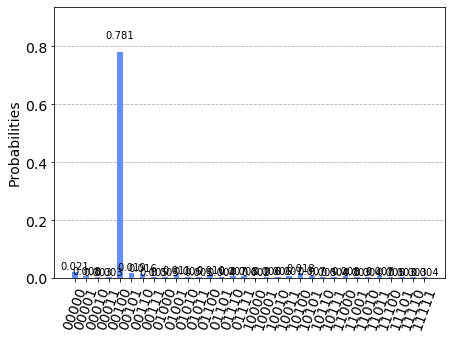

In [6]:
noise_model = get_noise(0.01, 0.000625)

backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024, noise_model=noise_model).result()
# results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
max_value = next(iter(answer.values()))

for key,value in answer.items():
    if value > max_value:
        max_value = value  
        max_key = key
print("Peak: ",max_key)

plot_histogram(answer)

### Efficiencies at Different P_gate Error Levels for Two Different Problem Oracles

|`Problem`|`Bits`|`Variant`|`Iterations`|`p_gate = 0;`|`0.01;`|`0.005;`|`0.0025;`|`0.00125;`|`0.000625`|`Peak` |
|:-------:|:----:|:-------:|:----------:|------------:|------:|-------:|--------:|--------:|---------:|------:|
| One     | 4    | 0       | 2          | 0.913       | 0.613 | 0.717  | 0.804   | 0.853   | 0.866    | 1101  |
| Two     | 5    | 2       | 3          | 0.903       | 0.304 | 0.508  | 0.653   | 0.746   | 0.812    | 00100 |

## Experiment 2

Solutions:
|1101>


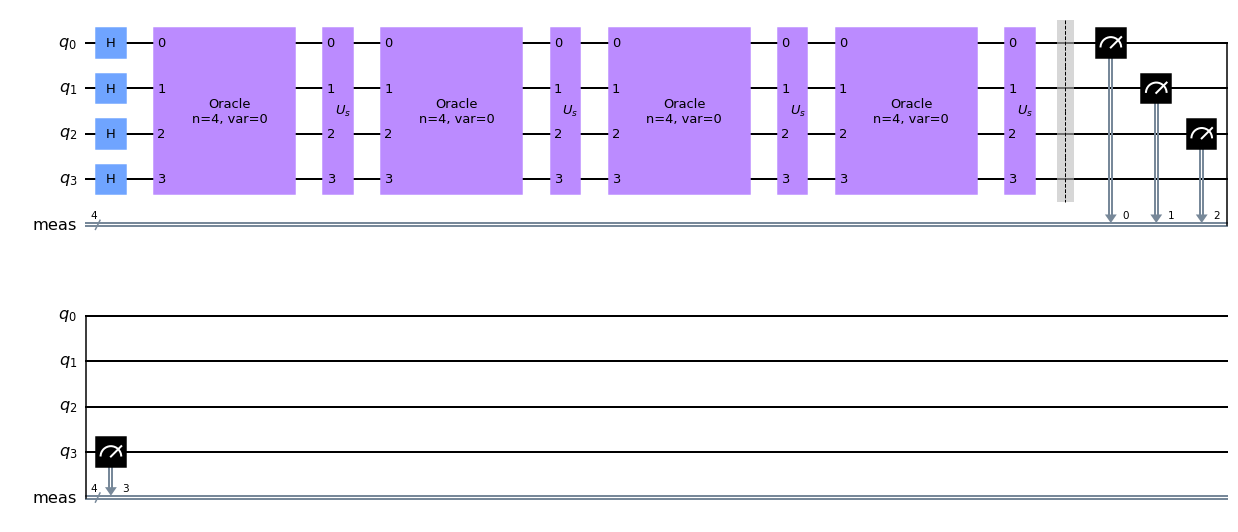

In [7]:
from qiskit_textbook.problems import grover_problem_oracle
n = 4
oracle = grover_problem_oracle(n, variant=0, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.measure_all()
qc.draw('mpl')

Peak:  1101


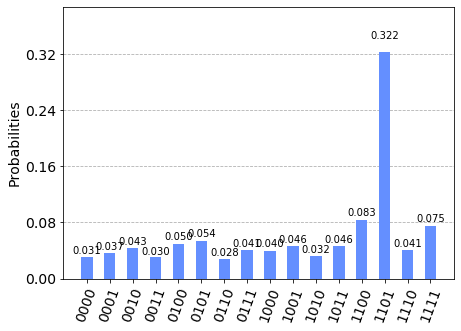

In [8]:
noise_model = get_noise(0.01, 0.01)

backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024, noise_model=noise_model).result()
# results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
max_value = next(iter(answer.values()))

for key,value in answer.items():
    if value > max_value:
        max_value = value  
        max_key = key
print("Peak: ",max_key)

plot_histogram(answer)

Solutions:
|00100>


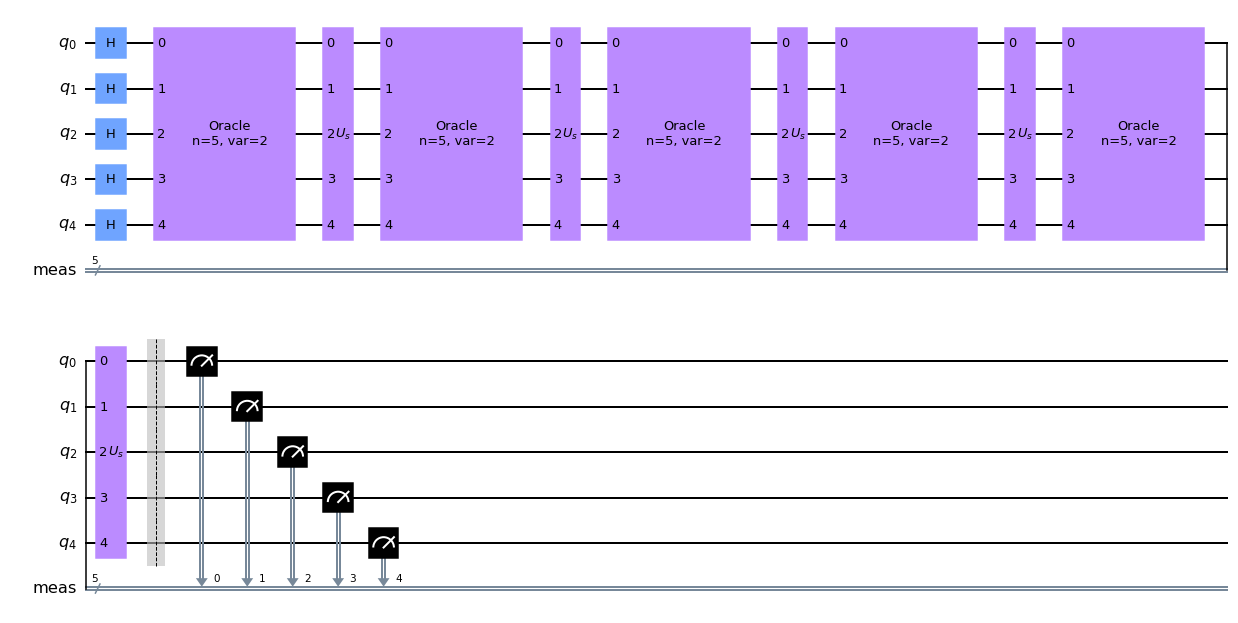

In [9]:
from qiskit_textbook.problems import grover_problem_oracle
n = 5
oracle = grover_problem_oracle(n, variant=2, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.measure_all()
qc.draw('mpl')

Peak:  00100


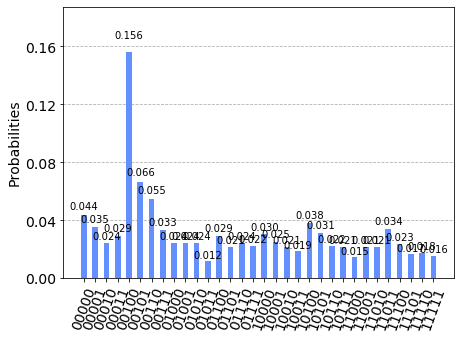

In [10]:
noise_model = get_noise(0.01, 0.01)

backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024, noise_model=noise_model).result()
# results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
max_value = next(iter(answer.values()))

for key,value in answer.items():
    if value > max_value:
        max_value = value  
        max_key = key
print("Peak: ",max_key)

plot_histogram(answer)

### Efficiencies at Different P_gate Error Levels for Two Different Problem Oracles

|`Problem`|`Bits`|`Variant`|`Iterations`|`p_gate`|`Efficiency`|`Peak` |
|:-------:|:----:|:-------:|:----------:|-------:|-----------:|------:|
| One     | 4    | 0       | 1          | 0.01   | 0.356      | 1101  |
| One     | 4    | 0       | 2          | 0.01   | 0.613      | 1101  |
| One     | 4    | 0       | 3          | 0.01   | 0.564      | 1101  |
| One     | 4    | 0       | 4          | 0.01   | 0.325      | 1101  |
| Two     | 5    | 2       | 1          | 0.01   | 0.174      | 00100 |
| Two     | 5    | 2       | 2          | 0.01   | 0.284      | 00100 |
| Two     | 5    | 2       | 3          | 0.01   | 0.299      | 00100 |
| Two     | 5    | 2       | 4          | 0.01   | 0.269      | 00100 |
| Two     | 5    | 2       | 5          | 0.01   | 0.174      | 00100 |


## Conclusion:

### Experiment 1:

#### Table 1: Efficiencies at Different P_gate Error Levels for Two Different Problem Oracles
|Problem|Bits|Variant|Iterations|p_gate = 0;|0.01;|0.005;|0.0025;|0.00125;|0.000625|Peak|
|:-------:|:----:|:-------:|:----------:|------------:|------:|-------:|--------:|--------:|---------:|------:|
| One     | 4    | 0       | 2          | 0.913       | 0.613 | 0.717  | 0.804   | 0.853   | 0.866    | 1101  |
| Two     | 5    | 2       | 3          | 0.903       | 0.304 | 0.508  | 0.653   | 0.746   | 0.812    | 00100 |

What impact does this have on the result of Grover’s algorithm?
The impact that this has on Grover's algorithm as you can see is that in table one it clearly shows that the less noise, the greater the probablity and thus closer to the result of the base case which is Grover's algorithm without any noise. 
The p_gates I used were 0.01, 0.005, 0.0025, 0.000625. I started with 0.01 and kept on dividing by 2 until the result was within 10% of the base case. Comparing the different p_gate levels to the base gate with respect to problem one: With a p_gate of 0.01 there is a ~33% decrease in probablity when compared to the base case, with a p_gate of 0.005 there is a ~21% decrease in probablity when compared to the base case, with a p_gate of 0.0025 there is a ~12% decrease in probablity when compared to the base case, with a p_gate of 0.00125 there is a ~7% decrease in probablity when compared to the base case,
and with a p_gate of 0.000625 there is a ~5% decrease in probablity when compared to the base case. Yes, p_gate of 0.00125 is within the 10% of the base case. But to also get within 10% of the base case for problem two I need to divide the p_gate of 0.00125 by 2 to obtain 0.000625 so can get within 10% of the base case for problem two, so I just decided to run it an additional time for problem one. Comparing the different p_gate levels to the base gate with respect to problem two: With a p_gate of 0.01 there is a ~66% decrease in probablity when compared to the base case, with a p_gate of 0.005 there is a ~44% decrease in probablity when compared to the base case, with a p_gate of 0.0025 there is a ~28% decrease in probablity when compared to the base case, with a p_gate of 0.00125 there is a ~17% decrease in probablity when compared to the base case,
and with a p_gate of 0.000625 there is a ~10% decrease in probablity when compared to the base case. For both oracle problems I got the correct peak. Overall, for both oracle problems in experiment one should that the greater the noise the more of a decrease in probablity in Grover's algorithm. 

### Experiment 2:

#### Table 2: Efficiencies at Different P_gate Error Levels for Two Different Problem Oracles
|`Problem`|`Bits`|`Variant`|`Iterations`|`p_gate`|`Efficiency`|`Peak` |
|:-------:|:----:|:-------:|:----------:|-------:|-----------:|------:|
| One     | 4    | 0       | 1          | 0.01   | 0.356      | 1101  |
| One     | 4    | 0       | 2          | 0.01   | 0.613      | 1101  |
| One     | 4    | 0       | 3          | 0.01   | 0.564      | 1101  |
| One     | 4    | 0       | 4          | 0.01   | 0.325      | 1101  |
| Two     | 5    | 2       | 1          | 0.01   | 0.174      | 00100 |
| Two     | 5    | 2       | 2          | 0.01   | 0.284      | 00100 |
| Two     | 5    | 2       | 3          | 0.01   | 0.299      | 00100 |
| Two     | 5    | 2       | 4          | 0.01   | 0.269      | 00100 |
| Two     | 5    | 2       | 5          | 0.01   | 0.174      | 00100 |

Is the hypothesis true? The Hypothesis for this experiment was that noise decreases the probability of obtaining the correct result, so performing more iterations of Grover’s algorithm will produce a better result. And an experiment was conducted to determine if that hypthesis is true. No, hypothesis is not true, as seen from table two, the results shows decrease in probablity starting from the iterations surpassing $\sqrt{n}$. Why do you think this is the case? Yes, noise decreases the probablity of obtaining the correct result. But performing more iterations of Grover's Algorithm will not produce a better results. This is because once Grover's Algorithm reaches $iterations$ of $\sqrt{n}$ where $n$ is the number of qubits for Grovers algorithm which then decreases due to an optimal solution that has already been reached with *iterations* being equal to $\sqrt{n}$. So by going over this optimal solution the probablity starts to decrease as shown in Table 2. For Problem Oracle One the optimal solution is reached at iteration 2 which makes sense because $\sqrt{4}=2$, whiles with Problem Oracle Two the optimal solution is reached at iteration 3 (iteration of 2 and 3 are very close), which makes sense because $\sqrt{5}=2.24$, and the ceiling of that is 3. I used p_gate of 0.01 due to the fact that this level of noise, which is the greatest used, had the most significant impact to Grover's Algorithm in Experiment 1. 